# DS-SF-26 | Codealong 06 | Introduction to Regression and Model Fit

## Setup

In [41]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [42]:
def read_dataset():
    return pd.read_csv(os.path.join('..', 'datasets', 'zillow-06-start.csv'), index_col = 'ID')

df = read_dataset()

## Part A1 - Simple Linear Regression

### Transforming Variables, e.g., scaling

Activity: How to scale SalePrice from $ to $M, Size and LotSize from sqft to "1,000 sqft"?

In [43]:
def scale_variables(df):
    # Sale price in $M
    # Size in 1,000 sqft
    # Lot size in 1,000 sqft

    # **TODO**
    df.SalePrice = df.SalePrice / (10 ** 6)
    df.Size = df.Size / (10 ** 3)
    df.LotSize = df.LotSize / (10 ** 3)
    
scale_variables(df)

### `SalePrice` as a function of `Size`

In [44]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Tue, 24 May 2016   Prob (F-statistic):           2.67e-58
Time:                        19:52:20   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model's parameters

In [45]:
model.params

Intercept    0.155052
Size         0.749728
dtype: float64

In [46]:
type(model.params)

pandas.core.series.Series

In [47]:
model.params['Intercept']

0.15505177276001383

### t-values

In [48]:
model.tvalues

Intercept     1.842394
Size         17.245775
dtype: float64

### p-values

In [49]:
model.pvalues

Intercept    6.572416e-02
Size         2.667697e-58
dtype: float64

### Confidence Intervals

In [50]:
model.conf_int(cols = [0, 1])

,0,1
Intercept,-0.010102,0.320205
Size,0.664415,0.835041


In [51]:
type(model.conf_int(cols = [0, 1]))

pandas.core.frame.DataFrame

## Part A2 - Simple Linear Regression

### `SalePrice` as a function of `Size` without `Intercept`

In [52]:
model = smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1255.
Date:                Tue, 24 May 2016   Prob (F-statistic):          7.83e-177
Time:                        19:52:20   Log-Likelihood:                -1689.6
No. Observations:                 967   AIC:                             3381.
Df Residuals:                     966   BIC:                             3386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size           0.8176      0.023     35.426      0.000         0.772     0.863
==============================================================================
Omnibus:                     1830.896   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3370566.094
Skew:                          13.300   Prob(JB):                         0.00
Kurtosis:                     291.005   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Drop outliers

Activity: How to drop outliers?

In [53]:
def drop_outliers(df):
    print 'Dropping outliers'
    print '- n (before) =', len(df)

    # TODO
    Q1 = df.SalePrice.quantile(.25)
    Q3 = df.SalePrice.quantile(.75)
    
    IQR = Q3 - Q1
    
    print Q1
    print Q3
    df.drop(df[(df.SalePrice > Q3 + 1.5 * IQR) | (df.SalePrice < Q1 - 1.5 * IQR)].index,inplace = True)
    print '- n (after)  =', len(df)
    
drop_outliers(df) # 20% of the houses that are more expensive that 1.53 millions, | = OR

Dropping outliers
- n (before) = 1000
0.8
1.5325
- n (after)  = 933


### `SalePrice` as a function of `Size` (again)

In [54]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.summary() # t is far greater than 2 so it's very significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     225.0
Date:                Tue, 24 May 2016   Prob (F-statistic):           1.41e-45
Time:                        19:52:27   Log-Likelihood:                -560.34
No. Observations:                 903   AIC:                             1125.
Df Residuals:                     901   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7082      0.032     22.152      0.000         0.645     0.771
Size           0.2784      0.019     15.002      0.000         0.242     0.315
==============================================================================
Omnibus:                       24.647   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.865
Skew:                           0.054   Prob(JB):                     2.01e-12
Kurtosis:                       4.192   Cond. No.                         4.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part B - How to check modeling assumptions?

### `.plot_regress_exog()`

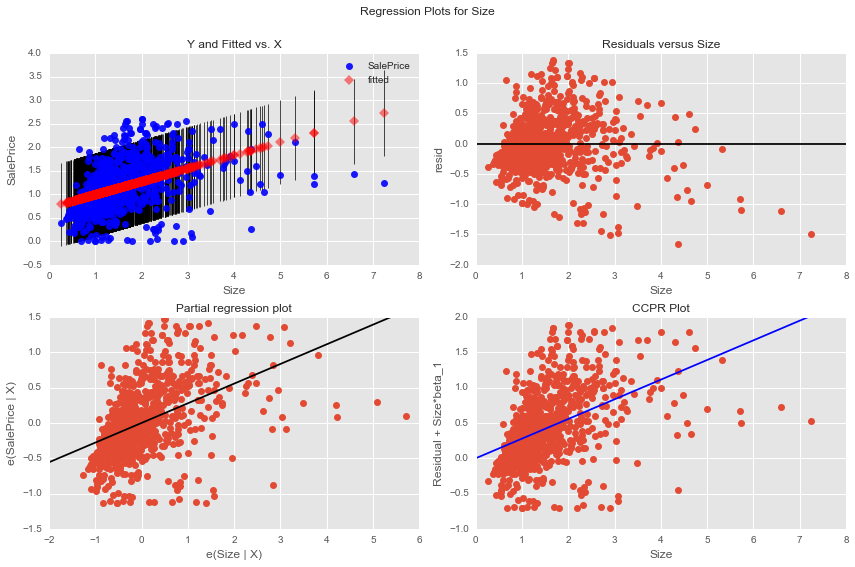

In [55]:
figure = plt.figure(figsize = (12, 8))
figure = sm.graphics.plot_regress_exog(model, 'Size', fig = figure)

## Part C1 - How to check normality assumption?

### Histogram (e.g., residuals)

Activity: How to get histograms of residuals?

In [56]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

# TODO

Is it normal?

### q-q plot (e.g., residuals) against a normal distribution

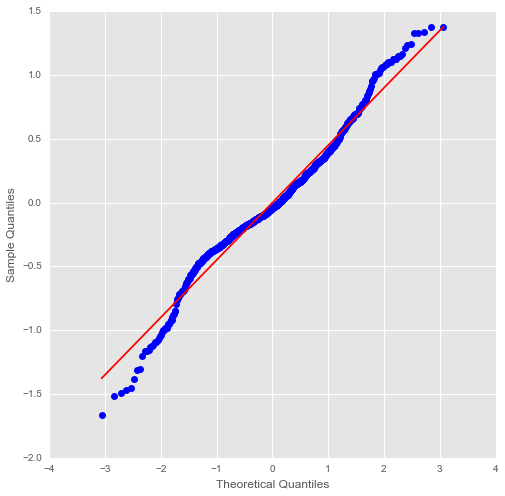

In [57]:
figure, ax = plt.subplots(figsize = (8, 8))
figure = sm.qqplot(model.resid, line = 's', ax = ax)

plt.show()

## Part C2 - How to check normality assumption?

### q-q plot of two normal distributions

`.qqplot()` with `line = 's'`

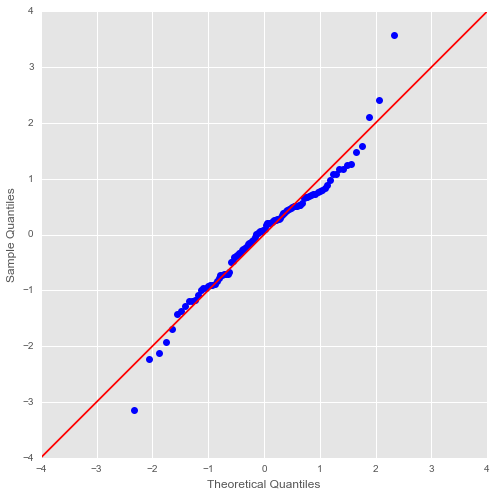

In [58]:
normal_array = np.random.normal(0, 1, size = 100)

figure, ax = plt.subplots(figsize = (8, 8))
figure = sm.qqplot(normal_array, line = '45', ax = ax)
plt.show()

`.qqplot()` with `line = '45'`; N(0, 1) vs. N(0, 1) 

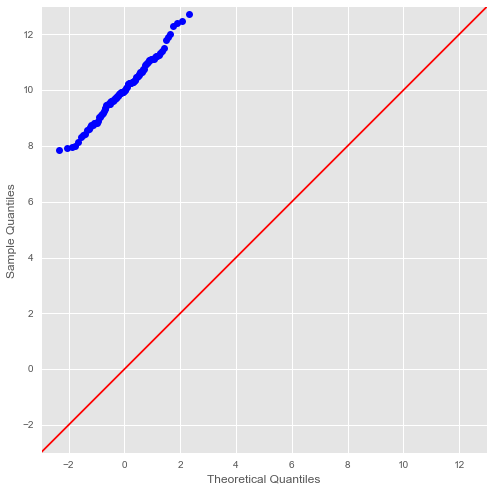

In [59]:
normal_array = np.random.normal(10, 1, size = 100)

figure, ax = plt.subplots(figsize = (8, 8))
figure = sm.qqplot(normal_array, line = '45', ax = ax)
plt.show()

`.qqplot()` with `line = 's'`; N(10, 1) vs. N(0, 1) 

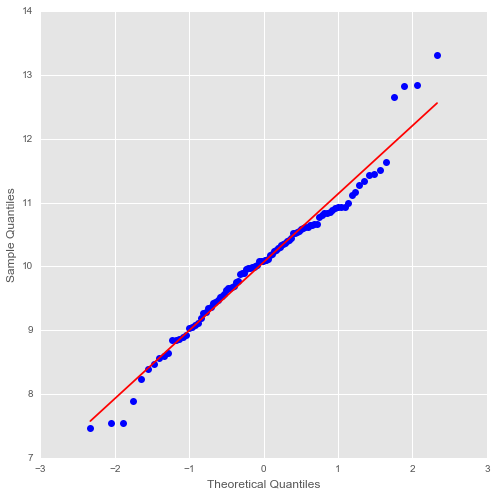

In [60]:
normal_array = np.random.normal(10, 1, size = 100)

figure, ax = plt.subplots(figsize = (8, 8))
figure = sm.qqplot(normal_array, line = 's', ax = ax)
plt.show()

`.qqplot()` with `line = '45'`; N(0, 10) vs. N(0, 1) 

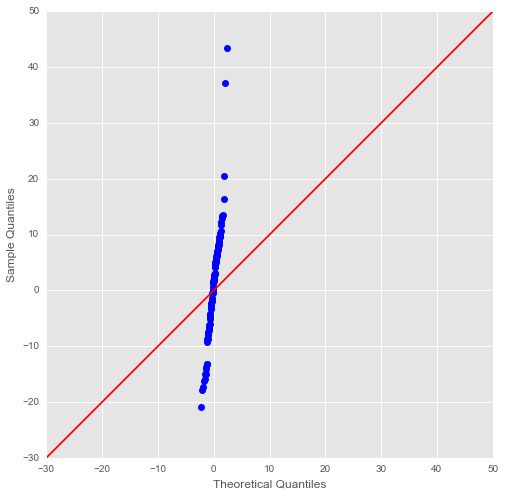

In [61]:
normal_array = np.random.normal(0, 10, size = 100)

figure, ax = plt.subplots(figsize = (8, 8))
figure = sm.qqplot(normal_array, line = '45', ax = ax)
plt.show()

## Part D - Inference and Fit

In [62]:
df = read_dataset() # reload the dataset to get our outliers back...

scale_variables(df) # scaling variables (function defined above)

### Effect of outliers on regression modeling - `SalePrice` as a function of `Size`

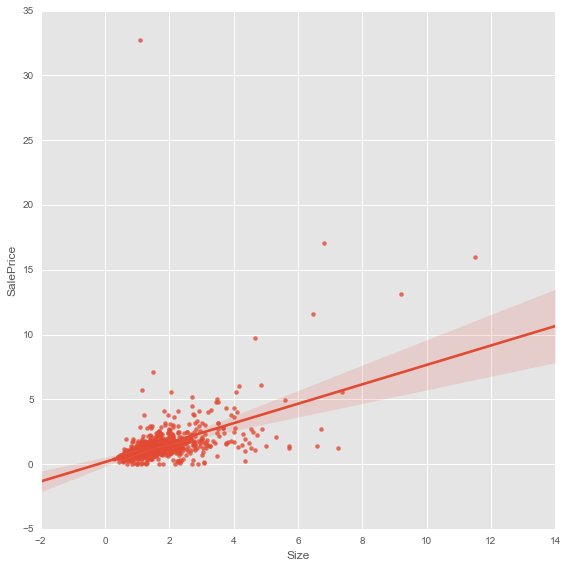

In [63]:
sns.lmplot('Size', 'SalePrice', df, size = 8)

### `SalePrice` as a function of `Size` after dropping the "worst" outlier

In [64]:
# TODO

sns.lmplot('Size', 'SalePrice', subset_df, size = 8)

NameError: name 'subset_df' is not defined

## Part E - R<sup>2</sup>

### `SalePrice` as a function of `Size`

In [ ]:
model = smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit()

model.summary()

### R<sup>2</sup>

In [ ]:
model.rsquared

In [ ]:
print 'With outliers:'
print '- SalePrice ~     Size; R^2 =', smf.ols(formula = 'SalePrice ~ Size', data = df).fit().rsquared
print '- SalePrice ~ 0 + Size; R^2 =', smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit().rsquared

print
drop_outliers(df) # dropping outliers (function defined above)
print

print 'Without outliers:'
print '- SalePrice ~     Size; R^2 =', smf.ols(formula = 'SalePrice ~ Size', data = df).fit().rsquared
print '- SalePrice ~ 0 + Size; R^2 =', smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit().rsquared

## Part F - Multiple Linear Regression

In [ ]:
df = read_dataset() # reload the dataset to get our outliers back...

scale_variables(df) # scaling variables (function defined above)

In [ ]:
model = smf.ols(formula = 'SalePrice ~ Size + BedCount', data = df).fit()

model.summary()

## Part G - Multicollinearity

Yet another way to transform variables: `.apply()`

### Transforming Variables (cont.)

In [ ]:
df[ ['SizeLog', 'LotSizeLog'] ] = df[ ['Size', 'LotSize'] ].apply(np.log10)
df[ ['SizeSqrt', 'LotSizeSqrt'] ] = df[ ['Size', 'LotSize'] ].apply(np.sqrt)
df[ ['SizeSquare', 'LotSizeSquare'] ] = df[ ['Size', 'LotSize'] ].apply(np.square)

In [ ]:
df

### Multicollinearity

Multicollinearity between Size, ln(Size), sqrt(Size), and Size^2

In [ ]:
df[ ['Size', 'SizeLog', 'SizeSqrt', 'SizeSquare' ] ].corr()

In [ ]:
model = smf.ols(formula = 'SalePrice ~ Size + SizeLog + SizeSqrt + SizeSquare', data = df).fit()

model.summary()

## Part H - Adjusted R<sup>2</sup>

In [ ]:
formula = 'SalePrice ~ 0 + IsAStudio + BedCount + BathCount + Size + LotSize'

model = smf.ols(formula = formula, data = df).fit()

print 'R^2 =', model.rsquared, '(original model)'

In [ ]:
x_df = pd.DataFrame(index = df.index)

for i in range(100):
    x = 'X{}'.format(i)
    x_df[x] = np.random.random(len(df))

formula = 'SalePrice ~ 0 + IsAStudio + BedCount + BathCount + Size + LotSize + BuiltInYear + '
formula += ' + '.join(x_df.columns.values)

x_df = x_df.join(df)

x_model = smf.ols(formula = formula, data = x_df).fit()

In [ ]:
# TODO